<a href="https://colab.research.google.com/github/LaurenOKane/Learning-Python/blob/main/M9T2_Data_Variable_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

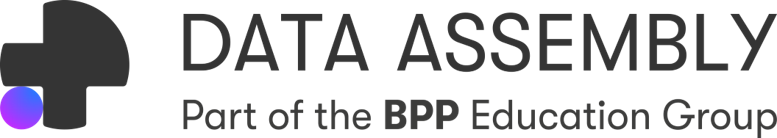

<h3><font color="#AA00BB">How you can use this Notebook</font></h3>
<p>This notebook was written to teach new concepts in data using Python.</p>
<p>You can read through the descriptions run the code (it should work!), or you may be taken through the code by one of our experts.</p>
<p>But one of the best habits to acquire is to re-write the code yourself.</p>
<ul><li>Experiment
<li>Break the code
<li>Build a deeper understanding of both the underlying data concepts and the code</ul>
<p>Don't worry if you make mistakes, we all do. The way to get better and make less mistakes is to write more code.</p>
<p>Enjoy!</p>
<p> - <i><font color="#AA00BB">Data Assembly team.</font></i></p>
<br>

> ❓🤔 = a question for us discuss

> ⌨️ = a task for you to try

> 🔑 = an authoritative reference or guide you may find useful

> 🚀 = **optional** material to develop yourself further



<a name="contents"></a>
## Contents

<br>1. [Identifying Correlated Variables](#section_1)
<br>2. [Implementing Dimensionality Reduction with Principal Componenent Analysis (PCA)](#section_2)
<br>3. [Model Performance Contrast: Impact of Feature Selection](#section_3)
<br>4. [Feature Engineering and One-hot Encoding](#section_4)


<h2><font color="#AA00BB">Welcome to our workbook on Variable Reduction!</font></h2>

Welcome to this topic on Variable reduction, specifically designed to help you deal with the complexities of multi-dimensional data. In this topic, you will delve into the challenges of high-dimensional datasets, particularly the problems caused by correlated variables.

We will guide you through identifying these variables and implementing effective strategies to handle them, ensuring your data analysis is robust and meaningful.

This topic also covers essential feature extraction and selection techniques, including Principal Component Analysis (PCA), providing practical tools to streamline your datasets and enhance model performance.

Let's get started!

<a name="section_1"></a>

# **1. Identifying Correlated Variables**


[Return to contents](#contents)


The dataset in question is a synthetic representation of a housing market. It includes several features commonly associated with housing data, such as:

- Size: The total square footage of the property.
- Rooms: The number of rooms in the property.
- Age: The age of the property in years.
- Location: The location of the property, categorized as Urban, Suburban, or Rural.
- Bathrooms: The number of bathrooms.
- Condition: A rating of the property's overall condition.
- School_Rating: A rating for nearby schools.
- Transport_Access: The quality of nearby transport links.
- Price: The market price of the property.
- Noise Features: Artificial features introduced to add complexity and randomness to the dataset.

### **Problem with Correlated Variables**
In data science and predictive modeling, highly correlated variables can pose several problems:

- **Multicollinearity**: In linear regression models, predictors that are highly correlated with each other can distort the estimation of regression coefficients, making them unreliable. This phenomenon, known as multicollinearity, can also inflate the variance of the coefficient estimates and make the model sensitive to changes in model specifications.

- **Overfitting**: Models with highly correlated predictors might overfit the training data. This means the model captures noise along with the underlying pattern, leading to poor performance on new, unseen data.

- **Redundancy**: Correlated variables often carry similar information. Including both in a model can be redundant, which not only makes the model more complex but can also affect its interpretability.

- **Efficiency**: Reducing the number of predictors through techniques like PCA or feature selection can make models more efficient in terms of computation and easier to interpret, without significantly sacrificing predictive power.

### **1.1 Loading and Exploring the Dataset**

Let's load the synthetic housing market dataset.
This allows us to understand the dataset's structure and the types of variables we're working with, which is essential before any analysis.

In [1]:
import pandas as pd

# Load the dataset
housing_df = pd.read_csv('https://raw.githubusercontent.com/BPP-Digital-Advanced-Data-Analytics/public_datasets/main/housing_market_dataset.csv')  # Replace with your dataset path

# Explore the first few rows of the dataset
housing_df.head()

,Size,Rooms,Age,Location,Bathrooms,Condition,School_Rating,Transport_Access,Noise_Feature_1,Noise_Feature_2,Price
0,1748.357077,4,30.228415,Rural,2,1,7,8,-0.032629,43,334127.957743
1,1430.867849,7,18.095538,Suburban,1,1,4,5,-2.462159,86,280945.277254
2,1823.844269,7,14.259174,Rural,2,4,5,10,-0.535687,96,405412.864924
3,2261.514928,2,17.188745,Rural,5,5,9,10,0.474654,1,333851.181554
4,1382.923313,5,25.793468,Rural,1,1,6,6,-0.510858,90,313802.774596


### **1.2 Obtaining and Visualizing Correlation Matrices**

Here we compute and visualize the correlation matrix.
This allows us to identify any strong correlations between variables, which is crucial for understanding relationships in the dataset.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = housing_df.corr()
corr_matrix

<ipython-input-2-fbd7290f810d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing_df.corr()


,Size,Rooms,Age,Bathrooms,Condition,School_Rating,Transport_Access,Noise_Feature_1,Noise_Feature_2,Price
Size,1.000000,0.013852,0.020206,0.025725,0.025143,0.018703,0.050556,-0.026605,0.035971,0.419894
Rooms,0.013852,1.000000,0.005990,-0.014425,-0.061466,0.042563,-0.007487,-0.027955,0.021179,0.034202
Age,0.020206,0.005990,1.000000,0.036578,-0.035606,0.014078,-0.019567,-0.001887,0.046246,-0.159359
Bathrooms,0.025725,-0.014425,0.036578,1.000000,0.025309,-0.000237,-0.003277,-0.004949,-0.018505,0.032127
Condition,0.025143,-0.061466,-0.035606,0.025309,1.000000,-0.044631,0.012333,0.001656,-0.018251,0.075115
School_Rating,0.018703,0.042563,0.014078,-0.000237,-0.044631,1.000000,0.031816,0.003413,0.039138,0.010963
Transport_Access,0.050556,-0.007487,-0.019567,-0.003277,0.012333,0.031816,1.000000,0.015031,-0.049629,0.042265
Noise_Feature_1,-0.026605,-0.027955,-0.001887,-0.004949,0.001656,0.003413,0.015031,1.000000,0.056817,0.006686
Noise_Feature_2,0.035971,0.021179,0.046246,-0.018505,-0.018251,0.039138,-0.049629,0.056817,1.000000,0.041147
Price,0.419894,0.034202,-0.159359,0.032127,0.075115,0.010963,0.042265,0.006686,0.041147,1.000000


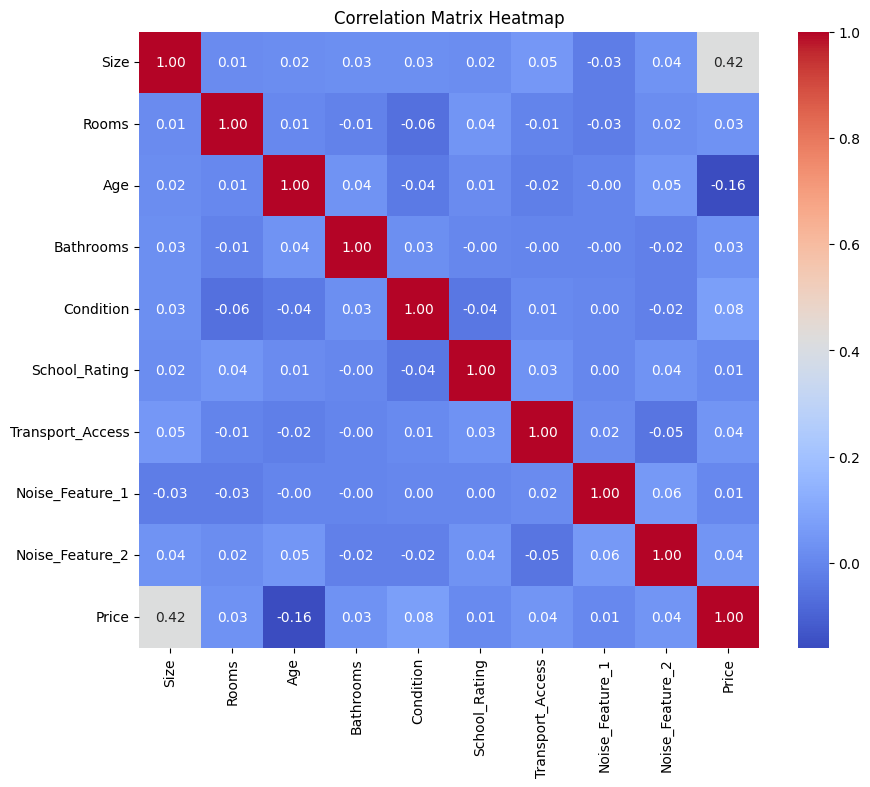

In [3]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

**Interpreting the Correlation Matrix Heatmap.**

Here we see on standout correlation where we see price strongly correlates with size (**0.42**). We also see a negative correlation with age and price (**-0.16**).

### **1.3 Calculating Variance Inflation Factors (VIF)**

Here we calculate the Variance Inflation Factor (VIF) for each feature to detect multicollinearity, which can impact the performance of linear regression models.



In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Select numerical features
numerical_cols = housing_df.select_dtypes(include=[np.number]).columns

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_cols
vif_data["VIF"] = [variance_inflation_factor(housing_df[numerical_cols].values, i) for i in range(len(numerical_cols))]
vif_data.sort_values(by="VIF", ascending=False)

,Feature,VIF
9,Price,27.681998
0,Size,13.056226
1,Rooms,6.108174
4,Condition,5.241803
6,Transport_Access,4.576752
2,Age,4.466835
5,School_Rating,4.283796
3,Bathrooms,4.004190
8,Noise_Feature_2,3.871508
7,Noise_Feature_1,1.007177


#### **Interpretation of the results**

**High Multicollinearity:**

- **Price (VIF = 27.68)**: Exhibits very high multicollinearity, suggesting a strong correlation with several other variables in the dataset, which is typical in housing data where price is often dependent on multiple property characteristics.
- **Size (VIF = 13.06**): Also shows high multicollinearity, indicating a significant correlation with features like rooms, bathrooms, and potentially the price.

**Moderate Multicollinearity:**

- **Rooms (VIF = 6.11)**: Indicates a moderate level of multicollinearity, likely correlated with size and possibly other factors like bathrooms.
- **Condition (VIF = 5.24**): On the borderline, suggesting a moderate correlation with other variables, possibly including age and price.

**Mild Multicollinearity:**

- **Transport_Access, Age, School_Rating, Bathrooms (VIFs 4.00 - 4.58)**: These features show a mild level of multicollinearity, suggesting some correlation with other variables but not to a concerning extent.

**Low Multicollinearity:**

- **Noise_Feature_2 (VIF = 3.87)**: Indicates a lower degree of multicollinearity.
- **Noise_Feature_1 (VIF = 1.01)**: Displays minimal multicollinearity with other features, implying it is relatively independent.

#### **Overall Implication:**

- The high VIFs for Price and Size are typical in real estate datasets and suggest careful consideration in their usage, especially in linear regression models.
- Moderate and mild VIFs indicate some level of correlation but not necessarily problematic. They warrant closer inspection and possibly some model experimentation.
- Low VIF values are generally not a concern and indicate that the features can be used in models without worries about multicollinearity.


##⌨️ **Exercise**

1. **Simple**: What is the correlation coefficient between 'Size' and 'Price' in the dataset? Write a line of code to find this value.(Code required)
2. **Moderate**: Generate a list of features that have a correlation greater than 0.3 with the 'Price'. Use coding to filter these features from the correlation matrix. (Code required)
3. **Challenging (Optional🚀)**: Write a function that takes the correlation matrix as input and returns a list of pairs of highly correlated features (above a threshold, say 0.7). Exclude self-correlation pairs. (Code required)


---

<a name="section_2"></a>

# **2. Implementing Dimensionality Reduction with Principal Componenent Analysis (PCA)**


[Return to contents](#contents)


We are implementing Principal Component Analysis (PCA) on the housing dataset.

**Why PCA?**

PCA is used for dimensionality reduction, transforming the data into a new coordinate system with fewer dimensions than the original dataset while retaining most of the variance (information). This is particularly useful in datasets with many variables, helping to reduce complexity and computational cost, and often improving model performance.

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing_df[numerical_cols])

# Applying PCA to reduce dimensions to 3 principal components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(housing_scaled)

# Explained Variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance - {explained_variance}')

Explained Variance - [0.14727334 0.11416771 0.10666317]


#### **What did we just do?**

- **Standardisation**: We first standardize the data using StandardScaler. Standardisation is crucial before applying PCA because PCA is sensitive to the variances of the initial variables. If there are large differences in the scales of the variables, those with larger scales will dominate the analysis.

- **Applying PCA**: We then apply PCA to the standardized data, reducing the dataset to 3 principal components. The choice of 3 components is arbitrary here and can be adjusted based on specific needs or variance ratio analysis.

- **Explained Variance Ratio**: The explained_variance_ratio_ attribute of the PCA object gives us the proportion of the dataset's variance that lies along each principal component. This helps us understand how much information (variance) is captured by each principal component.

**The explained variance** values [0.14727334, 0.11416771, 0.10666317] from PCA indicate the following:

- **First Principal Component (PC1 - 14.73% of Variance)**: Captures the most significant pattern in the data, explaining about 14.73% of its total variance.

- **Second Principal Component (PC2 - 11.42% of Variance)**: Represents the next most important pattern, orthogonal to the first, explaining 11.42% of the variance.

- **Third Principal Component (PC3 - 10.67% of Variance)**: Captures additional patterns, orthogonal to the first two components, accounting for 10.67% of the variance.

Overall Summary: The first three principal components together explain approximately 37.05% of the total variance in the dataset. This means they provide a simplified yet significant summary of the data's main patterns, though they do not capture all the variance present in the dataset.

**Visualising PCA Results**

To visualize the results of PCA, we can create plots to better understand the distribution and importance of each principal component.

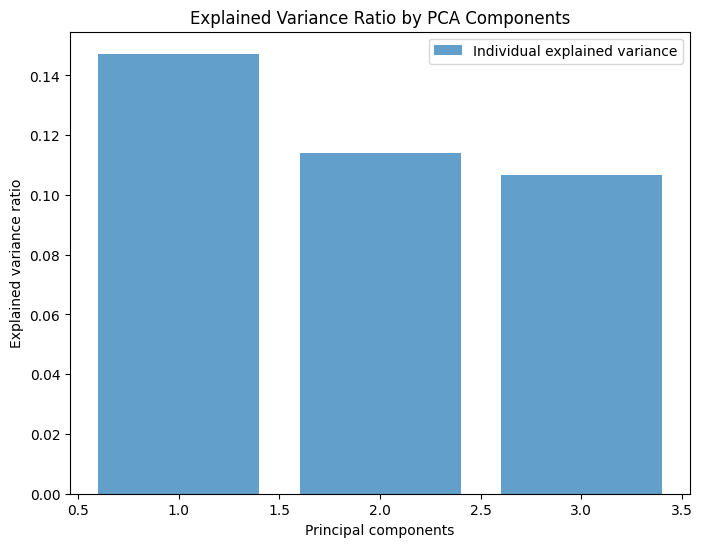

In [6]:
import matplotlib.pyplot as plt

# Plotting the explained variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, 4), explained_variance, alpha=0.7, align='center', label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance Ratio by PCA Components')
plt.legend(loc='best')
plt.show()

**Analysis of the Visualization:**

- This bar plot shows the proportion of the dataset's total variance that is captured by each of the first three principal components.
- Typically, the first few components capture the most variance, and each subsequent component captures less. This is visible in the declining height of the bars.
- The goal is to select a number of components that capture a significant proportion of the total variance while reducing the dataset's dimensionality.

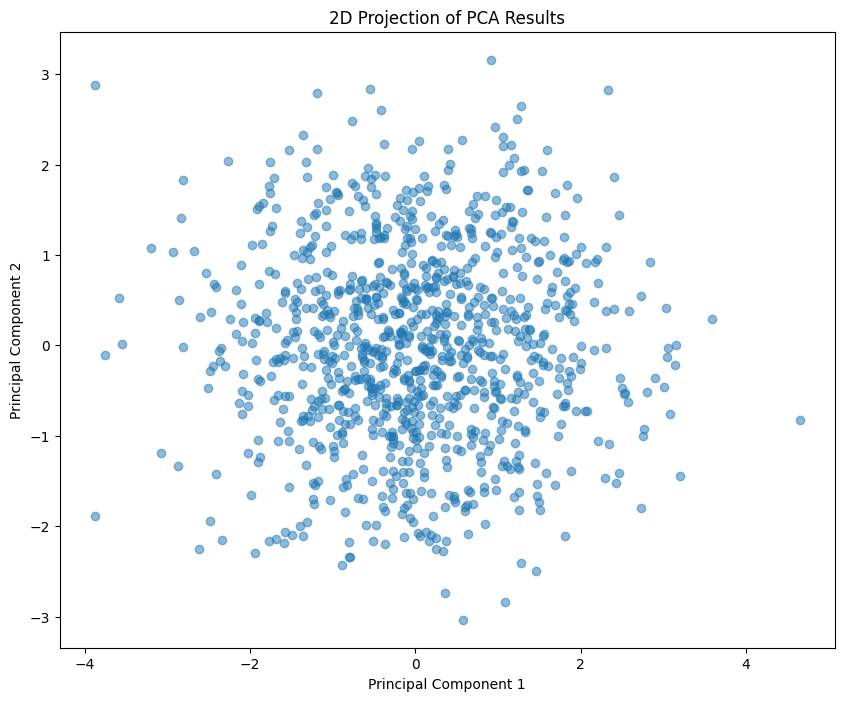

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assume housing_scaled is your scaled features data
pca = PCA(n_components=2)  # We use 2 for 2D plotting
principal_components = pca.fit_transform(housing_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Assuming pca_df is already created and contains PC1 and PC2
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Projection of PCA Results')
plt.show()

##⌨️ **Exercise**

1. **Simple**: After applying PCA with 3 components, what is the total variance explained by these components? Calculate this using the explained_variance array. (Code required)
2. **Moderate**: Visualise the first two principal components using a scatter plot. Make sure to label your axes and title your plot. (Code required)
3. **Challenging (Optional🚀)**: Perform PCA again but choose the number of components such that at least 80% of the total variance is explained. How many components are selected, and what is the cumulative variance explained by these components? (Code required)

---

<a name="section_3"></a>

# **3. Model Performance Contrast: Impact of Feature Selection**


[Return to contents](#contents)

In this section, we will explore how feature selection impacts the performance of a predictive model. Specifically, we will:

Train a linear regression model using the entire set of features.
Evaluate the model's performance using Mean Squared Error (MSE).

- Training and evaluating a model with all features.
- Training and evaluating a model with a selected subset of features.
- Comparing the performance to understand the impact of feature selection.

We start by separating our dataset into features (X) and the target variable (y, which is "Price" in this case). The data is then split into training and testing sets, ensuring we have a separate dataset to evaluate our model's performance.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

# One-hot encoding the 'Location' feature
X_full = pd.get_dummies(housing_df.drop("Price", axis=1), columns=['Location'])
y = housing_df["Price"]

# Splitting the dataset into training and testing sets
X_train_full, X_test_full, y_train, y_test = train_test_split(X_full, y, test_size=0.3, random_state=42)

# Training the model
model_full = LinearRegression()
model_full.fit(X_train_full, y_train)

# Making predictions and calculating MSE
y_pred_full = model_full.predict(X_test_full)
mse_full = mean_squared_error(y_test, y_pred_full)
print(f'Mean Square Error Full - {mse_full}')

Mean Square Error Full - 2588324315.7419133


Here, we train a Linear Regression model on our training data. Linear regression is chosen for its simplicity and effectiveness in capturing linear relationships between the target variable and features.

In [9]:
# Selecting a subset of features, for example, based on domain knowledge or previous analyses
selected_features = ['Size', 'Rooms', 'Bathrooms', 'Condition', 'Location_Urban', 'Location_Suburban']

X_selected = X_full[selected_features]
X_train_sel, X_test_sel = train_test_split(X_selected, test_size=0.3, random_state=42)

# Training the model
model_sel = LinearRegression()
model_sel.fit(X_train_sel, y_train)

# Making predictions and calculating MSE
y_pred_sel = model_sel.predict(X_test_sel)
mse_selected = mean_squared_error(y_test, y_pred_sel)
print(f'Mean Square Error Selected - {mse_selected}')

Mean Square Error Selected - 2694494219.8071218


**Results**

- The model trained with all features resulted in a lower MSE (2,588,324,315.74), suggesting it was more accurate in predicting house prices than the model with a limited set of features.

- The model trained with a subset of selected features showed a higher MSE (2,694,494,219.81). This implies that by using only these selected features, the model's predictive accuracy decreased compared to using the full set of features.

**Interpretation**:
- This outcome suggests that the full set of features contains valuable information that is lost when only the selected subset is used. It indicates that the additional features in the full model contribute meaningfully to the model’s predictive capability.

- The selected features might not have captured all the relevant information necessary for accurately predicting house prices. It's possible that important variables were omitted, or the chosen features did not have as strong a predictive power as anticipated.

- Context and Dataset Specificity: Feature selection effectiveness can vary greatly depending on the dataset and problem context. In this case, it seems that the dataset benefits from a broader range of features, implying a complex underlying structure where many variables play a role in determining house prices.



##⌨️ **Exercise**

1. **Simple**: Calculate and print the Mean Squared Error (MSE) of the linear regression model trained on the full feature set. (Code required)
2. **Moderate**: Train another linear regression model using only the 'Size' and 'Age' features. Calculate and compare its MSE with the full feature model's MSE.(Code required)
3. **Challenging (Optional🚀)**: Implement a loop to train separate linear regression models for each individual feature and calculate their MSEs. Identify and print the feature that results in the lowest MSE when used alone. (Code required)

---

<a name="section_4"></a>

# **4. Feature Selection**


[Return to contents](#contents)



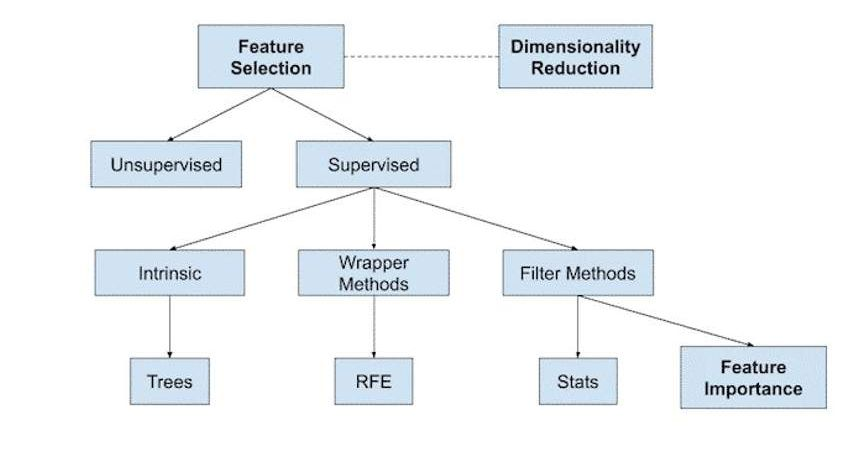

The goal of this lesson is to demonstrate how feature selection techniques can impact the performance of a predictive model.

We'll use two common methods:
- **SelectKBest -> Supervised -> Filter Method**
- **Recursive Feature Elimination (RFE) -> Supervised ->  Wrapper Method**

By applying these methods, we aim to identify the most significant features that contribute to predicting the target variable effectively.


Supervised **filter methods** select features based on their statistical relationship with the target variable without involving any machine learning models, while **wrapper methods** evaluate subsets of features using a predictive model to assess their quality.


### **4.1 SelectKBest:**

SelectKBest is used to select the top 'k' features based on a chosen statistical test, in this case, f_regression, which is suitable for linear regression tasks.

This method helps us identify the features that have the strongest relationship with the output variable. By focusing on these key features, we can simplify the model and potentially improve its performance.

In [10]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=5)

# If you're planning to train a model to assess the impact of selecting these top features, you'll use X_new instead of the full feature set.
# This allows you to train the model only on the most relevant features as determined by SelectKBest.
X_new = selector.fit_transform(X_train_full, y_train)
selected_features_bool = selector.get_support()
selected_features = X_train_full.columns[selected_features_bool]
selected_features

Index(['Size', 'Age', 'Bathrooms', 'Condition', 'Noise_Feature_2'], dtype='object')

The selected_features output you've provided – Index(['Size', 'Age', 'Bathrooms', 'Condition', 'Noise_Feature_2'], dtype='object') – represents the top 5 features selected by the SelectKBest method, but it's important to note that this is not a ranking. Rather, these are the 5 features that SelectKBest determined to have the strongest statistical relationship with the target variable based on the f_regression test. Here's what this means:

- **Not Ranked:** The features listed are not in a ranked order of importance. Instead, they are simply the ones that passed the selection threshold of being in the top 5 based on their test scores.

- **Top 5 Features**: These features are considered the most relevant or significant for predicting the target variable out of all the features in your dataset, according to the specific criteria of the f_regression test.

- **Usage**: In your subsequent analysis or model building, you would use only these 5 features (Size, Age, Bathrooms, Condition, Noise_Feature_2) instead of the entire set of original features. This can lead to simpler models and may help in avoiding issues like overfitting, especially if the original dataset contains a large number of features.

- **Interpretation**: Each of these features likely has a strong linear relationship with the target variable. It's worth investigating these relationships further to understand how they influence the target and how they interact with each other.

### **4.2 Recursive Feature Elimination (RFE)**

**How RFE Works**

Recursive Feature Elimination (RFE) is an iterative process to select important features for a predictive model. Here's a step-by-step breakdown of how RFE works:

- **Training**: RFE begins by training the model using all available features.
- **Feature Importance**: After the model is trained, RFE assigns an importance to each feature, typically based on specific attributes like coefficients in linear models.
- **Elimination**: The least important feature (or features) is then removed from the set.
- **Iteration**: This process of training the model, evaluating feature importance, and removing the least important feature is repeated iteratively.
- **Completion**: The iteration stops when the desired number of features is reached (specified by n_features_to_select).

In [11]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Assuming X is your feature set and y is your target variable
rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)
X_rfe = rfe.fit_transform(X_train_full, y_train)  # Transforms X by selecting top 5 features

# Getting the selected features
selected_features_boolean = rfe.support_
selected_features = [feature for feature, selected in zip(X_train_full.columns, selected_features_boolean) if selected]

# Getting the ranking of features
feature_ranking = rfe.ranking_

# Print the results
print("Selected Features:", selected_features)
print("Feature Ranking:", feature_ranking)

Selected Features: ['Bathrooms', 'Condition', 'Noise_Feature_1', 'Location_Suburban', 'Location_Urban']
Feature Ranking: [8 4 5 1 1 6 3 1 7 2 1 1]


#### **Interpreting the RFE Results**

- **Selected Features**: The RFE process identified **Bathrooms, Condition, Noise_Feature_1, Location_Suburban, and Location_Urban** as the top 5 most important features for predicting your target variable. These are the key variables that significantly influence your model.

- **Feature Ranking**: The rankings **[8, 4, 5, 1, 1, 6, 3, 1, 7, 2, 1, 1]** show the relative importance of each feature. A rank of '1' means the feature is among the top 5 and crucial for the model. Higher numbers indicate lesser importance, with the feature ranked '8' being the least important and eliminated first in the RFE process.

- **Summary**: This RFE analysis suggests focusing on bathrooms, property condition, a specific noise feature, and location (suburban or urban) as the most influential factors for your predictive model. The ranking provides a clear view of which features contribute most and least to the model's performance.

##⌨️ **Exercise**

1. **Simple**: Using the SelectKBest method, identify and print the top 5 features selected for predicting the 'Price'. (Code required)
2. **Moderate**: For RFE, plot a bar chart showing the ranking of each feature. Make sure the chart is clearly labeled.(Code required)
3. **Challenging (Optional🚀)**: Combine the insights from both SelectKBest and RFE to create a new model. Train this model on features that are common in both methods' top 5 selections and compare its performance (MSE) against the full feature model. (Code required)

---